In [82]:
# Eliminando avisos do algoritmo:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from sklearn.linear_model    import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics         import r2_score, mean_squared_error
import pandas                as pd
import numpy                 as np
import seaborn               as sns
import matplotlib.pyplot     as plt

In [83]:
df = pd.read_csv('Concrete_Data.csv')
df.rename(columns={"Cement (component 1)(kg in a m^3 mixture)":"Cimento(kg/m3)",
                   "Blast Furnace Slag (component 2)(kg in a m^3 mixture)":"Brita(kg/m3)",
                   "Fly Ash (component 3)(kg in a m^3 mixture)":"Cinzas Volante(kg/m3)",
                   "Water  (component 4)(kg in a m^3 mixture)":"Agua(kg/m3)",
                   "Superplasticizer (component 5)(kg in a m^3 mixture)":"Superplastificante(kg/m3)",
                   "Coarse Aggregate  (component 6)(kg in a m^3 mixture)":"Agregado Grosso(kg/m3)",
                   "Fine Aggregate (component 7)(kg in a m^3 mixture)":"Agregado Fino(kg/m3)",
                   "Age (day)":"Idade(dias)",
                   "Concrete compressive strength(MPa, megapascals) ":"Resistencia a Compressao do Concreto(MPa)"},
         inplace=True)

new_df = df.loc[df["Idade(dias)"] <= 29]
df1 = new_df

# Dividindo as variáveis em treino e variavel target:
y = df1['Resistencia a Compressao do Concreto(MPa)']
x = df1.drop('Resistencia a Compressao do Concreto(MPa)', axis=1)

In [94]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.30)

modelo = LinearRegression()
modelo.fit(x_treino, y_treino)

# Instanciando valores de predições realizadas nos dados de teste:
#y_train_pred = modelo.predict(x_treino) 

y_test_pred = modelo.predict(x_teste) 

r2_linear = r2_score(y_teste, y_test_pred)
rmse_linear = np.sqrt(mean_squared_error(y_teste, y_test_pred))

print(f'Coef R2 (Linear): {r2_linear}')
print(f'RMSE (linear): {rmse_linear}')

Coef R2 (Linear): 0.7989636337416088
RMSE (linear): 3.836435241401288


In [85]:
# Removendo valores de superplastificante e de Cinzas Volantes:
indexValues = df1[df1["Superplastificante(kg/m3)"] > 0].index
df1.drop(indexValues, inplace=True)

In [86]:
indexValues2 = df1[df1["Cinzas Volante(kg/m3)"] > 0].index
df1.drop(indexValues2, inplace=True)

In [87]:
indexValues3 = df1[df1["Resistencia a Compressao do Concreto(MPa)"] > 55].index
df1.drop(indexValues3, inplace=True)

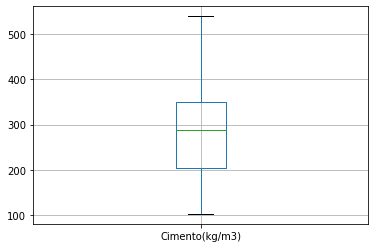

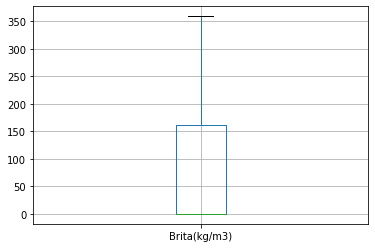

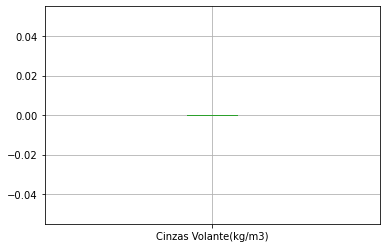

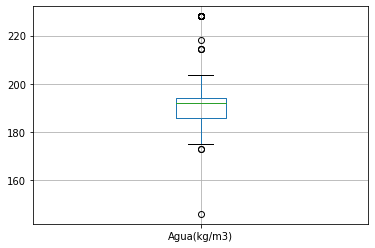

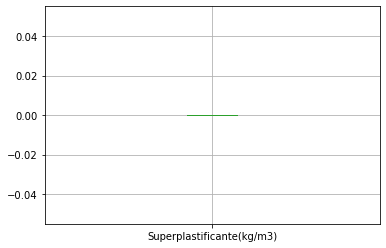

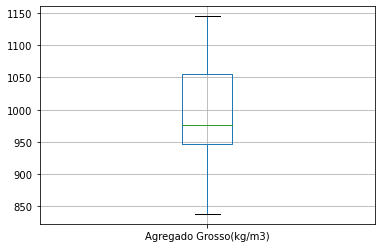

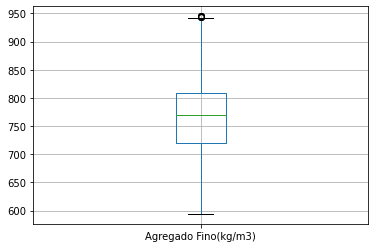

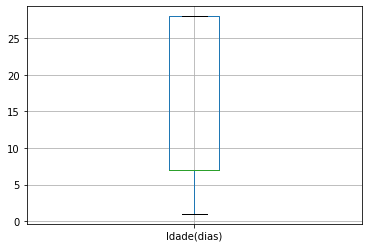

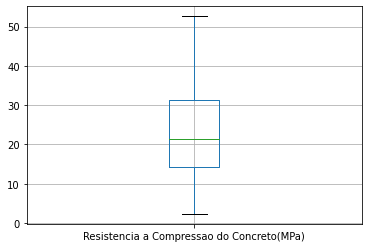

In [88]:
nome_colunas = ["Cimento(kg/m3)","Brita(kg/m3)","Cinzas Volante(kg/m3)",
                "Agua(kg/m3)","Superplastificante(kg/m3)",
                "Agregado Grosso(kg/m3)","Agregado Fino(kg/m3)",
                "Idade(dias)","Resistencia a Compressao do Concreto(MPa)"]

def boxplot_plot(dataset_name, nome_colunas):
    df = dataset_name
    for colunas in nome_colunas:
        df.boxplot(column=colunas)
        plt.show()

boxplot_plot(df1, nome_colunas)

In [89]:
# Dividindo as variáveis em treino e variavel target:
y = df1['Resistencia a Compressao do Concreto(MPa)']
x = df1.drop('Resistencia a Compressao do Concreto(MPa)', axis=1)

In [112]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.30, random_state=200)

modelo = LinearRegression()
modelo.fit(x_treino, y_treino)

# Instanciando valores de predições realizadas nos dados de teste:
#y_train_pred = modelo.predict(x_treino) 

y_test_pred = modelo.predict(x_teste) 

r2_linear = r2_score(y_teste, y_test_pred)
rmse_linear = np.sqrt(mean_squared_error(y_teste, y_test_pred))

print(f'Coef R2 (Linear): {r2_linear}')
print(f'RMSE (linear): {rmse_linear}')

Coef R2 (Linear): 0.8637108244582872
RMSE (linear): 3.9194107197508252


In [152]:
test_values = y_teste.to_numpy()
predicted = y_test_pred

data = {'Valores de teste':test_values,'previstos':predicted}

df_results = pd.DataFrame(data=data)

df_results.head()

,Valores de teste,previstos
0,7.68,4.773220
1,20.77,20.837076
2,25.62,23.058780
3,43.89,45.609505
4,27.34,32.416141


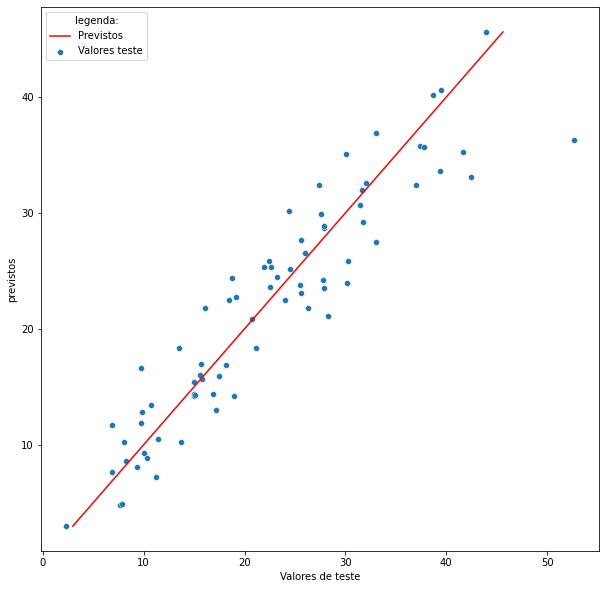

In [169]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_results, x='Valores de teste', y="previstos")
sns.lineplot(data=df_results, x='previstos', y='previstos', color='red',)
plt.legend(title='legenda:', labels=["Previstos", "Valores teste"])